In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [9]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/disk2/fli/REVIVAL2/data/meta/ParLQ-b.csv")

df

,AAs,var,seq,fitness,selectivity,n_mut,AA1,AA2,AA3,AA4,AA5,enzyme,substrate,substrate-smiles,cofactor,cofactor-smiles,product,product-smiles
0,EKFDW,W56E:Y57K:L59F:Q60D:F89W,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,43.224508,4.572915,5,E,K,F,D,W,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
1,EKMDY,W56E:Y57K:L59M:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,57.375614,5.043814,5,E,K,M,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
2,FGFDW,W56F:Y57G:L59F:Q60D:F89W,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,25.316717,2.377136,5,F,G,F,D,W,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
3,FGMAY,W56F:Y57G:L59M:Q60A:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,54.264988,6.242402,5,F,G,M,A,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
4,FKADY,W56F:Y57K:L59A:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,72.524943,8.330063,5,F,K,A,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,SKFDY,W56S:Y57K:L59F:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,67.698552,10.029965,5,S,K,F,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
87,SKMDY,W56S:Y57K:L59M:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,47.719258,7.915159,5,S,K,M,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
88,SYFDY,W56S:L59F:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,63.699683,6.480271,4,S,Y,F,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
89,SYMDY,W56S:L59M:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,26.171289,1.990509,4,S,Y,M,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN


In [31]:
len(df[df["n_mut"]==5])

74

In [33]:
91*0.25, 91-74

(22.75, 17)

In [8]:
y_true = df["fitness"].values
y_score = -1* df["n_mut"].values

In [34]:
len(y_true), len(y_score)

(91, 91)

In [20]:
top_n = 25

In [21]:
threshold_true = np.percentile(y_true, 100 - top_n)
threshold_model = np.percentile(y_score, 100 - top_n)

In [22]:
threshold_true, threshold_model

(65.25241955, -5.0)

In [23]:
# Select the top N% based on true scores
top_true = y_true >= threshold_true
top_true

array([False, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False])

In [28]:
y_score

array([-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -4, -4, -4, -5, -5, -5, -4,
       -4, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -4,
       -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5,
       -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5,
       -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -5, -5, -5, -5, -4,
       -5, -5, -5, -4, -4,  0])

In [29]:
threshold_model

-5.0

In [24]:
# Select the top N% based on model scores
top_model = y_score >= threshold_model
top_model

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [25]:
# Calculate True Positives (TP): How many correct top-N% predictions?
true_positives = (top_true) & (top_model)
true_positives

array([False, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False])

In [27]:
true_positives.sum(), top_true.sum()

(23, 23)

In [26]:
# Compute recall: TP / Total Actual Positives (Top-N% True Samples)
recall = true_positives.sum() / (top_true.sum()) if top_true.sum() > 0 else 0
recall

1.0

In [6]:
df.sort_values(by="fitness")

,AAs,var,seq,fitness,selectivity,n_mut,AA1,AA2,AA3,AA4,AA5,enzyme,substrate,substrate-smiles,cofactor,cofactor-smiles,product,product-smiles
15,GPFAW,W56G:Y57P:L59F:Q60A:F89W,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,2.996901,0.180043,5,G,P,F,A,W,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
33,HYMAY,W56H:L59M:Q60A:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,16.934836,6.359406,4,H,Y,M,A,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
40,MEMDW,W56M:Y57E:L59M:Q60D:F89W,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,17.609432,0.932284,5,M,E,M,D,W,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
90,WYLQF,WT,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,20.784105,0.784783,0,W,Y,L,Q,F,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
22,HGMAY,W56H:Y57G:L59M:Q60A:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,21.623068,9.470078,5,H,G,M,A,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,FYFDY,W56F:L59F:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,82.274400,15.252473,4,F,Y,F,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
25,HKFDY,W56H:Y57K:L59F:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,82.541131,10.950994,5,H,K,F,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
57,MKFKY,W56M:Y57K:L59F:Q60K:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,82.691752,11.646061,5,M,K,F,K,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN
56,MKFDY,W56M:Y57K:L59F:Q60D:F89Y,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,89.271628,10.153336,5,M,K,F,D,Y,ParLQ,b,C=CC1=CC=CC=C1,carbene-heme,C=CC1=C(C=C2C(C)=C(C=C)C3=[N]2[Fe]45(N6C(C(C)=...,NaN,NaN


In [4]:
import matplotlib.pyplot as plt

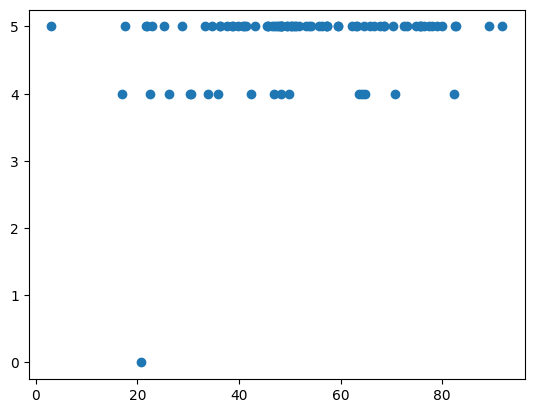

In [5]:
plt.scatter(df["fitness"], df["n_mut"])